<a href="https://colab.research.google.com/github/julianovale/PO240_Meta_heuristica/blob/main/PO240_Semana05e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema da mochila

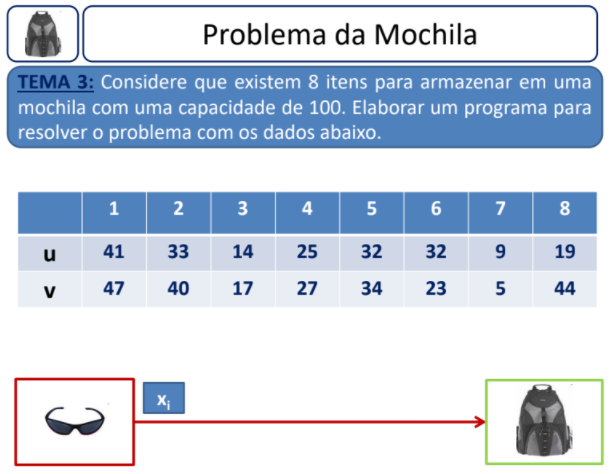

In [6]:
# instalação e importação = rodar 2 vezes
! pip install ortools
from ortools.linear_solver import pywraplp

In [7]:
from ortools.linear_solver import pywraplp

# Dados do problema.
# Custos de alocação do consultor i para cada tarefa j.
utility = [
        [41,  33,  14,  25, 32, 32, 9, 19]
        ]
# Matriz com gasto de horas do consultor i em cada tarefa j.        
a = [ 
      [47, 40, 17, 27, 34, 23, 5, 44]
    ] 

# Capacidade da mochila.
f = [100]
# Demanda das tarefas.
#d = [1, 1, 1, 1, 1, 1, 1, 1]

num_mochilas = len(utility)
num_items = len(utility[0])

# Solver
# Criando uma interface para usar o solver.
solver = pywraplp.Solver('Modelo da Mochila', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

# Variáveis
# x[i, j] é uma matriz de alocações do consultor i
# para a tarefa j.
x = {}
for i in range(num_mochilas):
  for j in range(num_items):
    x[i,j] = solver.IntVar(0, 1, '')

# Restrições
# Para cada máquina a soma das alocações para um
# consultor não pode exceder sua capacidade de produção.
for i in range(num_mochilas):
  solver.Add(solver.Sum([a[i][j]*x[i, j] for j in range(num_items)]) <= f[i],name='RMochilas '+str(i))

# Para cada mercado a soma dos fluxos de entrada
# deve atender a demanda.
#for j in range(num_tarefas):
#  solver.Add(solver.Sum([x[i, j] for i in range(num_consultores)]) == d[j],name='RTarefas '+str(j))

# Função Objetivo.
objective_terms = []
for i in range(num_mochilas):
  for j in range(num_items):
    objective_terms.append(utility[i][j] * x[i, j])
solver.Maximize(solver.Sum(objective_terms))

# Resolve
status = solver.Solve()

# Relatório da solução.
if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
    print('Utilidade total = ', solver.Objective().Value(), '\n')
    for i in range(num_mochilas):
      cap = 0
      #print('O consultor %d foi alocado para a: ' % (i+1))  
      for j in range(num_items):
          # Test if x[i,j] is 1 (with tolerance for floating point arithmetic).
          if x[i, j].solution_value() == 1:
            print('Item %d com utilidade %8.2f e gasto de recurso % 8.2f' %
                  (j+1, utility[i][j], a[i][j]))
            cap = cap + a[i][j]
      print('Capacidade total da mochila utilizada: %8.2f %% ' % ((cap/f[i])*100))
      print('-----------------------\n')

Utilidade total =  99.0 

Item 2 com utilidade    33.00 e gasto de recurso    40.00
Item 4 com utilidade    25.00 e gasto de recurso    27.00
Item 6 com utilidade    32.00 e gasto de recurso    23.00
Item 7 com utilidade     9.00 e gasto de recurso     5.00
Capacidade total da mochila utilizada:    95.00 % 
-----------------------

